In [1]:
# Task 1: Import Libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Used for numerical operations, specifically for NaN handling


In [2]:
#Task 2: Load Data

# Load data from the 'cov.csv' file (ensure this file is in your working directory)
df = pd.read_csv('cov.csv')

print("Data loaded successfully!")


Data loaded successfully!


In [3]:
#Task 3:check colomons
print("Columns in the raw DataFrame:")
print(df.columns)

Columns in the raw DataFrame:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vac

In [6]:
#Task 5: Identify Initial Missing Values
print("\nInitial Missing values per column (before cleaning):")
print(df.isnull().sum())


Initial Missing values per column (before cleaning):
iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [21]:
#  Data Cleaning
## Task 1: Define Countries of Interest
### Define Countries of Interest
countries_of_interest = ['Kenya', 'United States', 'India', 'Brazil', 'Germany', 'World']

In [ ]:
# --- Optional Stretch Goal: Allow User Input for Country & Date Range ---


print("--- User Input for Analysis ---")

# --- Get Country Input ---
# Display available countries for the user to choose from
# Note: This list will be from the full 'df', not 'df_filtered' yet
available_countries = sorted(df['location'].unique().tolist())
print(f"Available countries: {', '.join(available_countries)}")

# Get user input for countries
while True:
    country_input = input("Enter countries to analyze (comma-separated, e.g., Kenya, United States): ").strip()
    if not country_input:
        print("No countries entered. Please try again.")
        continue
    
    selected_countries = [c.strip() for c in country_input.split(',')]
    
    # Validate input: check if all selected countries are in the available list
    invalid_countries = [c for c in selected_countries if c not in available_countries]
    if invalid_countries:
        print(f"Error: The following countries were not found: {', '.join(invalid_countries)}. Please check spelling and try again.")
    else:
        # Add 'World' as an option if the user didn't specify it, or always include it
        if 'World' not in selected_countries and 'World' in available_countries:
             selected_countries.append('World')
        print(f"Analyzing: {', '.join(selected_countries)}")
        break

# --- Get Date Range Input ---
# Determine the min/max dates available in your full dataset
min_date_available = df['date'].min().strftime('%Y-%m-%d')
max_date_available = df['date'].max().strftime('%Y-%m-%d')

print(f"\nAvailable date range: From {min_date_available} to {max_date_available}")

start_date_str = input(f"Enter start date (YYYY-MM-DD, default {min_date_available}): ").strip()
end_date_str = input(f"Enter end date (YYYY-MM-DD, default {max_date_available}): ").strip()

# Set defaults if user leaves blank
start_date_str = start_date_str if start_date_str else min_date_available
end_date_str = end_date_str if end_date_str else max_date_available

# Convert to datetime objects for filtering
try:
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    if start_date > end_date:
        print("Warning: Start date is after end date. Swapping them.")
        start_date, end_date = end_date, start_date
    print(f"Analyzing data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}.")
except ValueError:
    print("Invalid date format. Using full date range.")
    start_date = pd.to_datetime(min_date_available)
    end_date = pd.to_datetime(max_date_available)

# --- Apply User Filters to df_filtered ---
# This will replace the fixed `countries_of_interest` list.
df_filtered = df[
    (df['location'].isin(selected_countries)) &
    (df['date'] >= start_date) &
    (df['date'] <= end_date)
].copy()

# Re-run date conversion and numerical filling after dynamic filtering
# (You might want to make the fillna part a function to avoid repetition if you use this multiple times)
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered = df_filtered.sort_values(by=['location', 'date']).reset_index(drop=True)

numerical_cols_to_fill = [
    'total_cases', 'new_cases', 'new_cases_smoothed',
    'total_deaths', 'new_deaths', 'new_deaths_smoothed',
    'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',
    'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'population'
]

for col in numerical_cols_to_fill:
    if col in df_filtered.columns:
        df_filtered[col] = df_filtered[col].fillna(0)

print("\nDataFrame re-filtered and cleaned based on user input.")
print(f"Number of rows in filtered data: {len(df_filtered)}")
print(f"Filtered locations: {df_filtered['location'].unique()}")

--- User Input for Analysis ---
Available countries: Afghanistan, Africa, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Asia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire Sint Eustatius and Saba, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Cook Islands, Costa Rica, Cote d'Ivoire, Croatia, Cuba, Curacao, Cyprus, Czechia, Democratic Republic of Congo, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, England, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Europe, European Union (27), Falkland Islands, Faroe Islands, Fiji, Finland, France, French Guiana, French Polynesia, Gabon, Gambia, Georgia, Ge

In [ ]:
## Task 2: Filter Data for Selected Countries
### Filter the DataFrame for only the countries of interest
df_filtered = df[df['location'].isin(countries_of_interest)].copy()

print(f"\nDataFrame filtered for {len(countries_of_interest)} countries.")
print(df_filtered['location'].unique())



DataFrame filtered for 6 countries.
['Brazil' 'Germany' 'India' 'Kenya' 'United States' 'World']


In [9]:
##Task 3: Convert Date Column to Datetime
# Convert 'date' column to datetime objects
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

print("\n'date' column converted to datetime format.")
print(df_filtered['date'].dtype)


'date' column converted to datetime format.
datetime64[ns]


In [10]:
##Task 4: Sort Data
# Sort data by location and date to ensure proper time series plotting
df_filtered = df_filtered.sort_values(by=['location', 'date']).reset_index(drop=True)

print("\nDataFrame sorted by location and date.")


DataFrame sorted by location and date.


In [11]:
##Task 5: Handle Missing Numerical Values (Crucial for Plotting)
# Identify numerical columns that will be used for plotting and analysis
numerical_cols_to_fill = [
    'total_cases', 'new_cases', 'new_cases_smoothed',
    'total_deaths', 'new_deaths', 'new_deaths_smoothed',
    'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',
    'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'population' # Including population as it's a key numerical column
]

# Fill NaN values in these specific numerical columns with 0
for col in numerical_cols_to_fill:
    if col in df_filtered.columns: # Check if column exists before filling
        df_filtered[col] = df_filtered[col].fillna(0)

print("\nNumerical columns filled with 0 for missing values.")

# Verify missing values after cleaning (should show 0 for the filled columns)
print("\nMissing values after numerical cleaning for relevant columns:")
print(df_filtered[numerical_cols_to_fill].isnull().sum())


Numerical columns filled with 0 for missing values.

Missing values after numerical cleaning for relevant columns:
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         0
total_deaths_per_million               0
new_deaths_per_million                 0
new_deaths_smoothed_per_million        0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
population                             0
dtype: int64


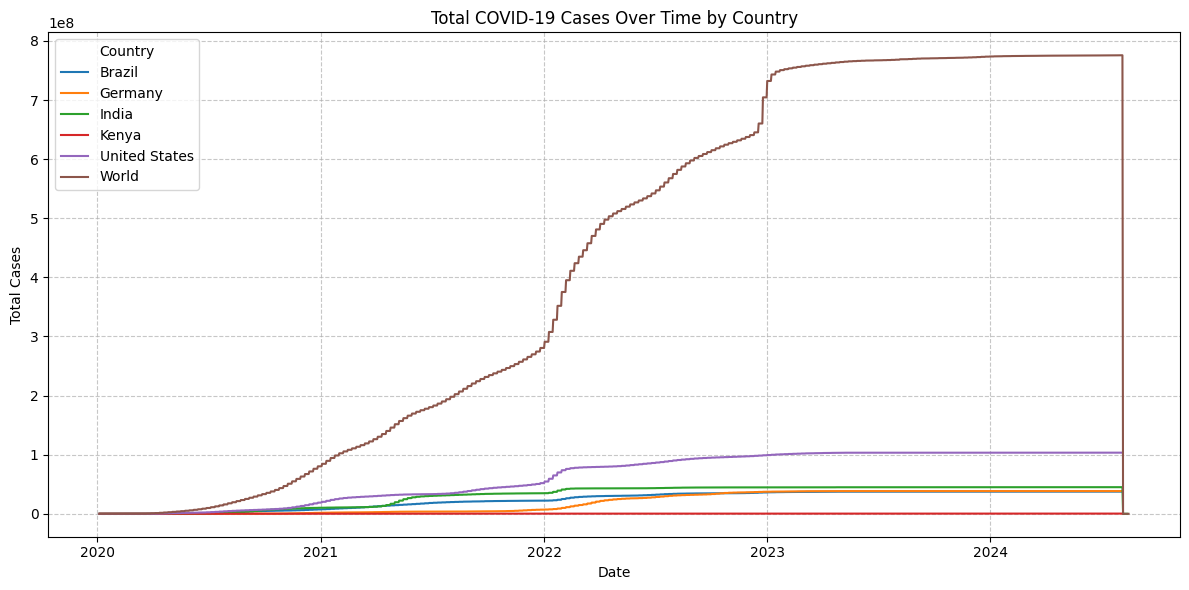

In [12]:
#Exploratory Data Analysis (EDA)
##Task 1: Plot Total Cases Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

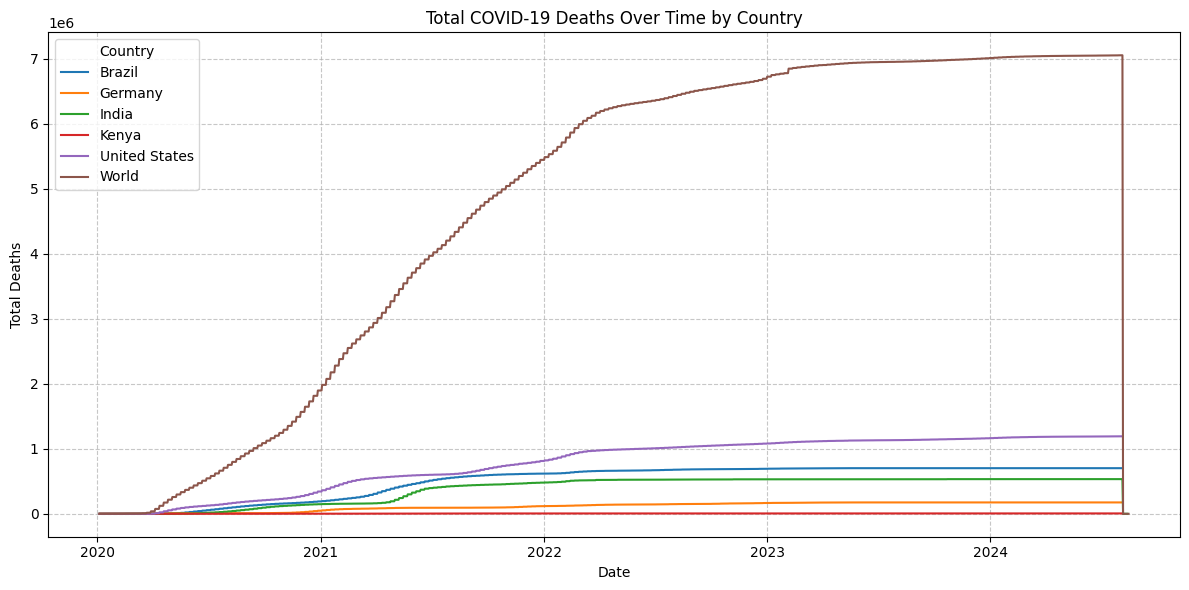

In [13]:
##Task 2: Plot Total Deaths Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

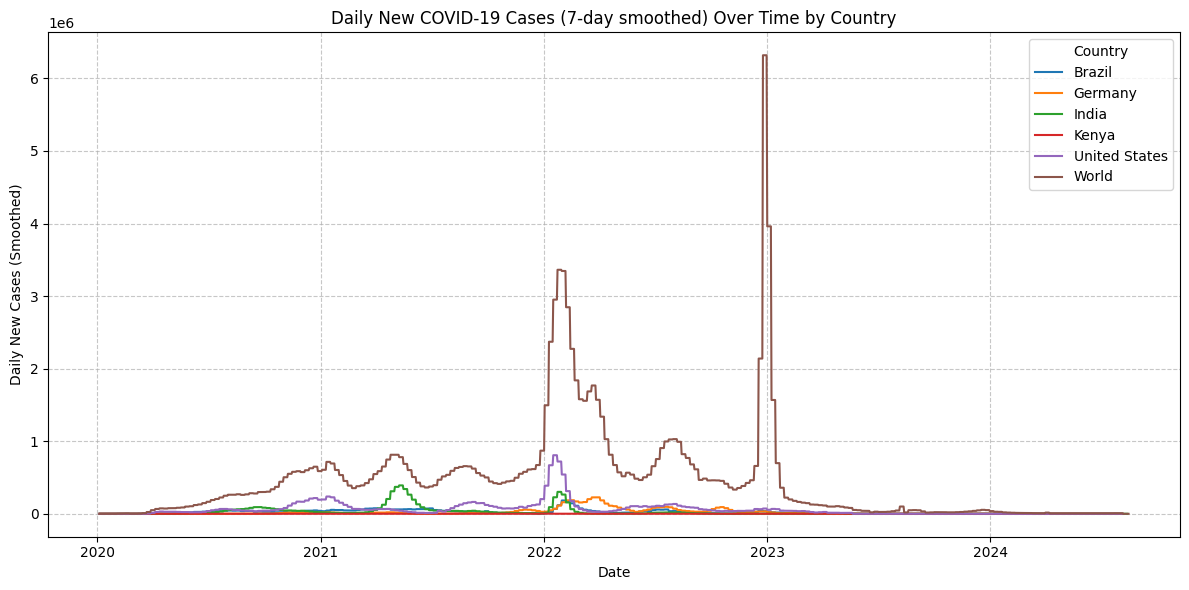

In [14]:
##Task 3: Compare Daily New Cases (7-day smoothed)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='new_cases_smoothed', hue='location')
plt.title('Daily New COVID-19 Cases (7-day smoothed) Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Daily New Cases (Smoothed)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [15]:
##Task 4: Calculate the Case Fatality Ratio (CFR)
# Calculate CFR for the latest available data for each country
# We need to handle potential division by zero for total_cases if it's 0 (meaning no cases reported yet or cleaned to 0)
# Use a small epsilon to avoid division by zero or set CFR to 0 if total_cases is 0
cfr_data = df_filtered.groupby('location').apply(lambda x: x.iloc[-1]) # Get the last row for each country (latest data)

# Calculate CFR, handling division by zero
# If total_cases is 0, CFR is 0. Otherwise, it's (total_deaths / total_cases) * 100
cfr_data['case_fatality_ratio'] = np.where(
    cfr_data['total_cases'] > 0,
    (cfr_data['total_deaths'] / cfr_data['total_cases']) * 100,
    0
)

# Select relevant columns and sort by CFR
cfr_result = cfr_data[['location', 'total_cases', 'total_deaths', 'case_fatality_ratio']].sort_values(by='case_fatality_ratio', ascending=False)

print("\nCase Fatality Ratio (%) for selected countries (latest data):")
print(cfr_result.round(2)) # Round to 2 decimal places for better readability


Case Fatality Ratio (%) for selected countries (latest data):
                    location  total_cases  total_deaths  case_fatality_ratio
location                                                                    
Brazil                Brazil   37511921.0      702116.0                 1.87
Kenya                  Kenya     344106.0        5689.0                 1.65
United States  United States  103436829.0     1193165.0                 1.15
Germany              Germany   38437756.0      174979.0                 0.46
India                  India          0.0           0.0                 0.00
World                  World          0.0           0.0                 0.00


C:\Users\Degefa\AppData\Local\Temp\ipykernel_4168\1497444835.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cfr_data = df_filtered.groupby('location').apply(lambda x: x.iloc[-1]) # Get the last row for each country (latest data)


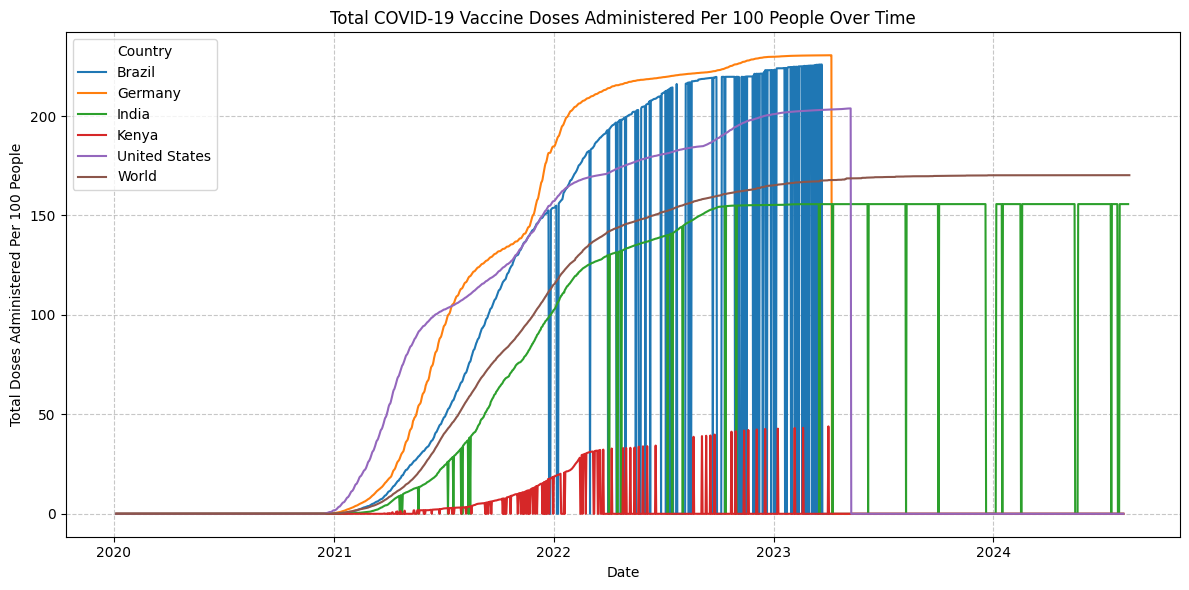

In [16]:
#Visualizing Vaccination Progress
##Task 1: Plot Cumulative Vaccinations Over Time (Per Hundred)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_vaccinations_per_hundred', hue='location')
plt.title('Total COVID-19 Vaccine Doses Administered Per 100 People Over Time')
plt.xlabel('Date')
plt.ylabel('Total Doses Administered Per 100 People')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

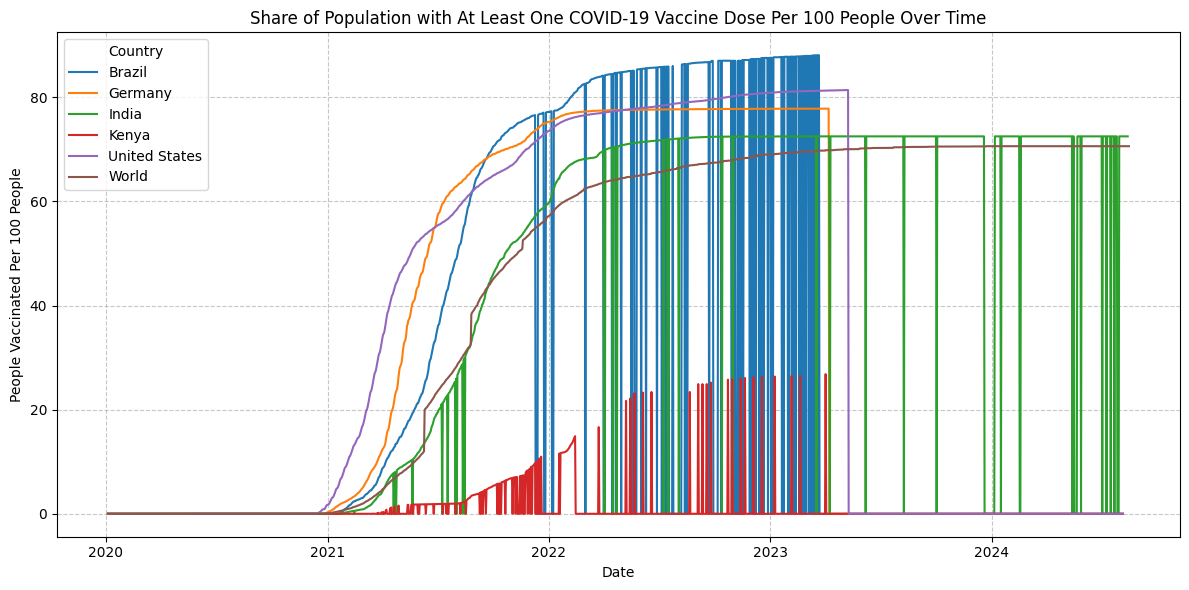

In [17]:
##Task 2: Plot People Vaccinated with At Least One Dose Over Time (Per Hundred)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='people_vaccinated_per_hundred', hue='location')
plt.title('Share of Population with At Least One COVID-19 Vaccine Dose Per 100 People Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated Per 100 People')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

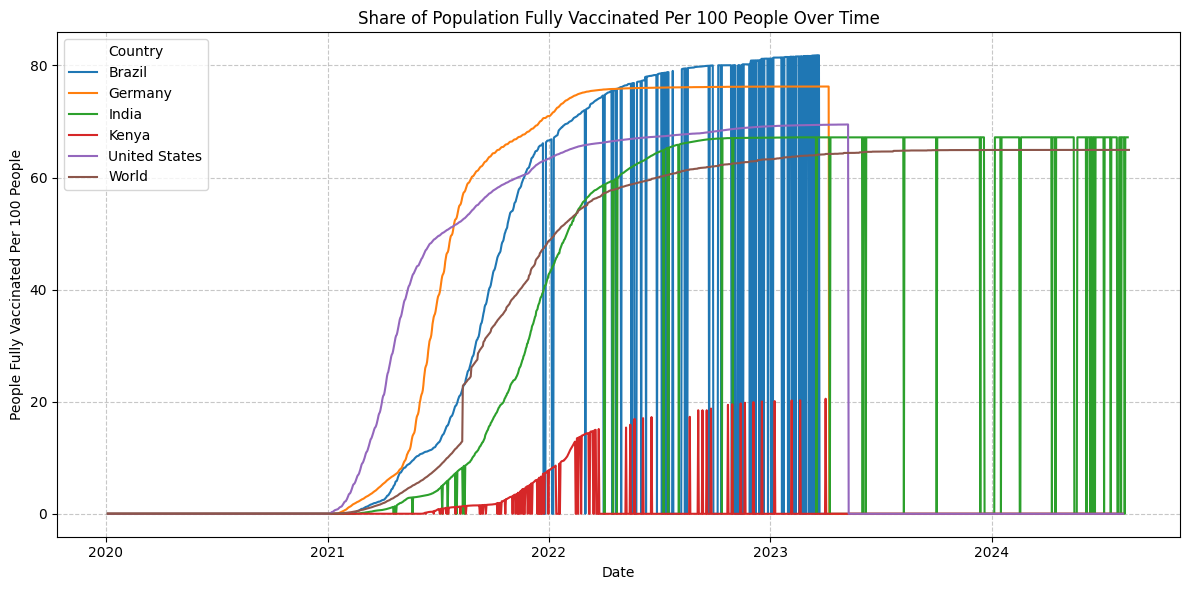

In [18]:
##Task 3: Plot People Fully Vaccinated Over Time (Per Hundred)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='people_fully_vaccinated_per_hundred', hue='location')
plt.title('Share of Population Fully Vaccinated Per 100 People Over Time')
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated Per 100 People')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

C:\Users\Degefa\AppData\Local\Temp\ipykernel_4168\3037485691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_vaccination_data_countries, x='people_fully_vaccinated_per_hundred', y='location', palette='viridis')


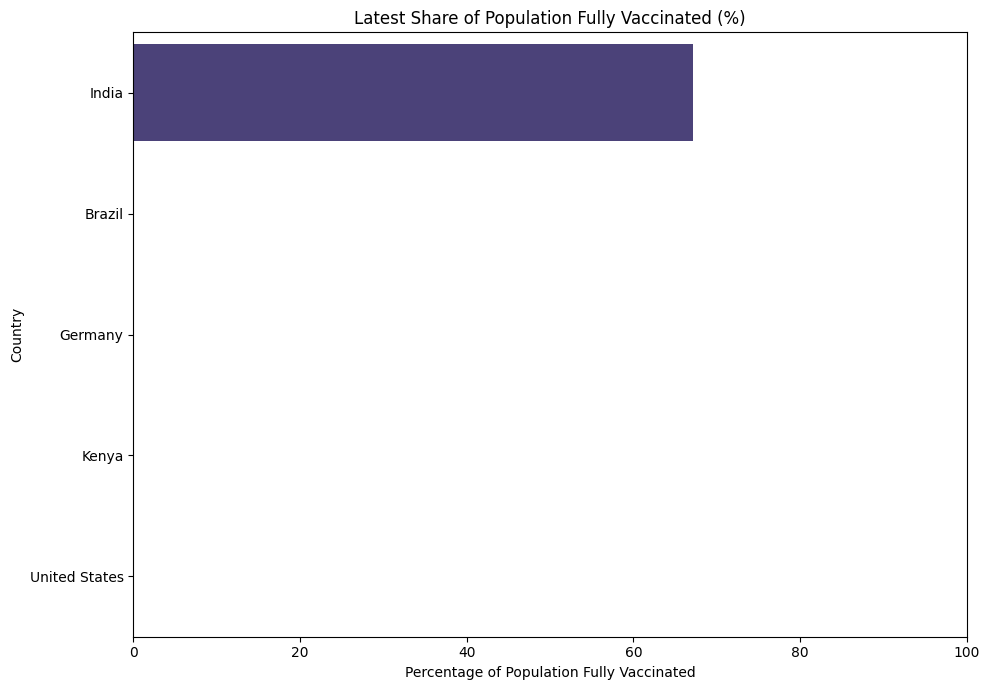


Latest Full Vaccination Coverage (% of Population):
        location  people_fully_vaccinated_per_hundred
2          India                                67.18
0         Brazil                                 0.00
1        Germany                                 0.00
3          Kenya                                 0.00
4  United States                                 0.00


In [19]:
##Task 4: Compare Latest Full Vaccination Status
# Get the latest data point for each country
latest_vaccination_data = df_filtered.groupby('location').last().reset_index()

# Filter out 'World' if you want to focus on individual countries for this comparison
latest_vaccination_data_countries = latest_vaccination_data[latest_vaccination_data['location'] != 'World']

# Sort for better visualization
latest_vaccination_data_countries = latest_vaccination_data_countries.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(data=latest_vaccination_data_countries, x='people_fully_vaccinated_per_hundred', y='location', palette='viridis')
plt.title('Latest Share of Population Fully Vaccinated (%)')
plt.xlabel('Percentage of Population Fully Vaccinated')
plt.ylabel('Country')
plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100 for percentage
plt.tight_layout()
plt.show()

# Print these values
print("\nLatest Full Vaccination Coverage (% of Population):")
print(latest_vaccination_data_countries[['location', 'people_fully_vaccinated_per_hundred']].round(2))

In [20]:
#Build a Choropleth Map
# # OPTIONAL: CHOROPLETH MAP (Requires Plotly Express and a broader dataset)
# # If you want to run this, you'll need to install plotly: pip install plotly
# import plotly.express as px

# # To make a choropleth, we typically use the full dataset and filter for the latest date
# # Make sure 'iso_code' is not null for mapping
# df_latest = df.dropna(subset=['iso_code', 'total_cases_per_million', 'people_fully_vaccinated_per_hundred']).copy()
# df_latest['date'] = pd.to_datetime(df_latest['date'])
# df_latest = df_latest.sort_values(by='date').groupby('iso_code').last().reset_index()

# # Filter out continents and 'World' entry (as they don't have iso_codes for country mapping)
# df_latest_countries = df_latest[~df_latest['location'].isin(['World', 'Europe', 'Asia', 'Africa', 'North America', 'South America', 'Oceania'])]

# # Map 1: Total Cases per Million (Latest)
# fig_cases = px.choropleth(df_latest_countries,
#                           locations="iso_code",
#                           color="total_cases_per_million",
#                           hover_name="location",
#                           color_continuous_scale=px.colors.sequential.Plasma,
#                           title='Total COVID-19 Cases Per Million People (Latest Data)',
#                           projection="natural earth")
# fig_cases.show()

# # Map 2: Fully Vaccinated Per Hundred (Latest)
# fig_vacc = px.choropleth(df_latest_countries,
#                          locations="iso_code",
#                          color="people_fully_vaccinated_per_hundred",
#                          hover_name="location",
#                          color_continuous_scale=px.colors.sequential.Viridis,
#                          title='Share of Population Fully Vaccinated Per 100 People (Latest Data)',
#                          projection="natural earth")
# fig_vacc.show()
